In [705]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score

In [657]:
sonar=pd.read_csv('sonar_all_data.csv',header=None)

In [658]:
sonar.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [659]:
sonar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

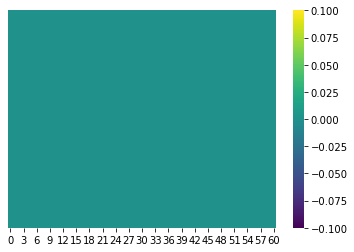

In [660]:
sns.heatmap(sonar.isna(),yticklabels=False,cmap='viridis')

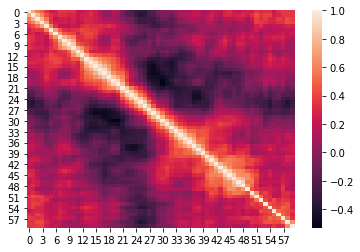

In [661]:
sns.heatmap(sonar.corr())

In [662]:
le=LabelEncoder()

In [663]:
sonar[60]=le.fit_transform(sonar[60])

In [664]:
sonar.shape

(208, 61)

In [665]:
zs=zscore(sonar)

In [666]:
sonar=sonar[(zs<3).all(axis=1)]

In [667]:
sonar.shape

(168, 61)

In [668]:
sonar.skew()

0     1.260141
1     1.305137
2     1.651471
3     1.237233
4     0.921870
        ...   
56    1.378156
57    1.364882
58    1.464334
59    1.144572
60    0.000000
Length: 61, dtype: float64

In [669]:
for col in sonar.columns:
    if abs(sonar.loc[:,col]).skew()>0.55:
        sonar.loc[:,col]=np.log1p(sonar.loc[:,col])

In [670]:
sonar.skew()

0     1.211293
1     1.228298
2     1.537569
3     1.133208
4     0.821050
        ...   
56    1.362574
57    1.349570
58    1.447639
59    1.134093
60    0.000000
Length: 61, dtype: float64

In [671]:
sc=StandardScaler()

In [672]:
sonar.iloc[:,60:]

,60
0,1
1,1
4,1
6,1
7,1
...,...
203,0
204,0
205,0
206,0


In [673]:
sonar.iloc[:,:60]

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.019803,0.036428,0.041909,0.020489,0.091120,0.094037,0.1539,0.148506,0.270714,0.191529,...,0.022935,0.002696,0.006479,0.015775,0.007174,0.016562,0.017840,0.008365,0.008960,0.003195
1,0.044304,0.050978,0.080935,0.066630,0.111810,0.229762,0.2156,0.298696,0.287957,0.252469,...,0.012423,0.008365,0.008861,0.004789,0.009356,0.018920,0.013903,0.004888,0.005187,0.004390
4,0.073436,0.064476,0.046979,0.038644,0.057325,0.062881,0.1209,0.220500,0.304834,0.368732,...,0.015480,0.003095,0.005385,0.010445,0.010940,0.001499,0.007174,0.004789,0.010643,0.009356
6,0.031208,0.091302,0.124074,0.131730,0.154779,0.157858,0.0731,0.131116,0.189214,0.301067,...,0.019312,0.019901,0.024497,0.013015,0.006976,0.013706,0.009158,0.014199,0.003594,0.010247
7,0.050598,0.053351,0.080842,0.031402,0.109572,0.088194,0.1027,0.059495,0.136714,0.249824,...,0.005187,0.008067,0.011929,0.004490,0.012027,0.009653,0.008464,0.004689,0.004789,0.005286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.018527,0.034015,0.016660,0.017545,0.038547,0.151003,0.2028,0.156491,0.209288,0.237756,...,0.020097,0.011533,0.009752,0.019705,0.003295,0.010049,0.006479,0.011434,0.019116,0.015578
204,0.031789,0.010049,0.029365,0.054867,0.073250,0.091485,0.0990,0.096945,0.098034,0.195073,...,0.005087,0.006081,0.009257,0.013410,0.006280,0.006280,0.003394,0.003195,0.006181,0.006678
205,0.050883,0.042772,0.017840,0.028782,0.034498,0.110736,0.1257,0.111362,0.118494,0.225461,...,0.015381,0.015873,0.002896,0.005087,0.006181,0.008861,0.013903,0.013706,0.007671,0.003095
206,0.029850,0.034691,0.047837,0.059023,0.016562,0.126985,0.1465,0.106430,0.177728,0.211395,...,0.004191,0.008563,0.004589,0.012521,0.003594,0.003494,0.003394,0.007869,0.003594,0.004789


In [674]:
sonar.iloc[:,:60]=sc.fit_transform(sonar.iloc[:,:60])

In [675]:
sonar.shape

(168, 61)

In [676]:
X=sonar.iloc[:,:60]
y=sonar.iloc[:,60:]

In [677]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [678]:
lc=LogisticRegression()

In [679]:
X_train.shape

(112, 60)

In [680]:
lc.fit(X_train,y_train.values.ravel())

LogisticRegression()

In [681]:
lc_predict=lc.predict(X_test)

In [682]:
print(confusion_matrix(y_test,lc_predict))
print()
print(classification_report(y_test,lc_predict))

[[23  5]
 [ 4 24]]

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.83      0.86      0.84        28

    accuracy                           0.84        56
   macro avg       0.84      0.84      0.84        56
weighted avg       0.84      0.84      0.84        56



In [683]:
def model_select (model):
    maxscore=0
    maxrandomstate=0
    for x in range (42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train.values.ravel())
        mdpredict=md.predict(X_test)
        r2score=r2_score(y_test,mdpredict)
        #print("R2 score for random state {b} is {c}".format(b=x,c=r2score))
        
        if r2score>maxscore:
            maxscore=r2score
            maxrandomstate=x
    #print()
    print("Best score is {} at random state {}".format(maxscore,maxrandomstate))

In [684]:
model_select(LogisticRegression)

Best score is 0.6428571428571428 at random state 84


In [685]:
model_select(KNeighborsClassifier)

Best score is 0.49743589743589745 at random state 98


In [686]:
model_select(SVC)

Best score is 0.7857142857142857 at random state 84


In [687]:
model_select(GaussianNB)

Best score is 0.5692307692307693 at random state 97


In [688]:
model_select(DecisionTreeClassifier)

Best score is 0.3563218390804598 at random state 66


In [689]:
model_select(RandomForestClassifier)

Best score is 0.7846153846153846 at random state 57


In [691]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=84)

In [692]:
svc_params={'C':[1.0,10.0,20.0,50.0,80.0,100.0,200.0]}
gscvs=GridSearchCV(SVC(),svc_params,refit=False)

In [700]:
gscvs.fit(X_train,y_train.values.ravel())

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 20.0, 50.0, 80.0, 100.0, 200.0]},
             refit=False)

In [701]:
gscvs.best_params_

{'C': 10.0}

In [697]:
svc=SVC(C=1.0)
svc.fit(X_train,y_train.values.ravel())
svc_predict=svc.predict(X_test)

In [698]:
r2_score(y_test,svc_predict)

0.7857142857142857

In [703]:
print(confusion_matrix(y_test,svc_predict))
print()
print(classification_report(y_test,svc_predict))

[[26  2]
 [ 1 27]]

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.93      0.96      0.95        28

    accuracy                           0.95        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.95      0.95      0.95        56



In [706]:
joblib.dump(svc,'SVC_Sonar.joblib')

['SVC_Sonar.joblib']